In [1]:
import os 
from glob import glob 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pandas as pd
from shutil import copyfile,rmtree
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard


Using TensorFlow backend.


In [2]:
smile_txt = open("./SMILE_list.txt", "r")
nosmile_txt = open("./NON-SMILE_list.txt", "r")

all_images = glob('./lfwcrop_grey/faces/*.pgm')

lista_smile = smile_txt.readlines()
lista_nosmile = nosmile_txt.readlines()

smile = []
nosmile = []
path = "./lfwcrop_grey/faces/"
for line in lista_smile:
        # remover a quebra de linha '/n' e extensão
        c = line[:-5]
        
        c = c+".pgm"
        
        if path + c in all_images:
            
        
            smile.append(c)
        
for line in lista_nosmile:
        # remover a quebra de linha '/n' e extensão
        c = line[:-5]
        
        c = c+".pgm"
        
        if path + c in all_images:
            
        
            nosmile.append(c)


ns = len(smile)
nns = len(nosmile)
print("Smile: %s, No-Smile: %s"  %(ns,nns ))

Smile: 599, No-Smile: 602


##  Smile train, teste, val 

In [3]:
# Smile train, teste, val 
n_train = int (ns - (ns * 0.3))
n_test = int (ns * 0.20)
n_val = int (ns * 0.10)

total = n_test + n_train + n_val

print("SMILE -->N Train: %s N test: %s, N val: %s" %(n_train, n_test, n_val))
print(total)

SMILE -->N Train: 419 N test: 119, N val: 59
597


In [4]:
train_smile = smile[:n_train] #70%
test_smile = smile[n_train:n_train+n_test] #20%
val_smile = smile[n_train+n_test:] #10%

print("SMILE -->Train %s, Teste %s, Val %s" %(len(train_smile),len(test_smile), len(val_smile) ))

SMILE -->Train 419, Teste 119, Val 61


##  No-Smile train, teste, val 

In [5]:
# Smile train, teste, val 
n_train = int (nns - (nns * 0.3))
n_test = int (nns * 0.20)
n_val = int (nns * 0.10)

total = n_test + n_train + n_val

print("NOSMILE -->N Train: %s N test: %s, N val: %s" %(n_train, n_test, n_val))
print(total)



NOSMILE -->N Train: 421 N test: 120, N val: 60
601


In [6]:
train_nosmile = nosmile[:n_train] #70%
test_nosmile = nosmile[n_train:n_train+n_test] #20%
val_nosmile = nosmile[n_train+n_test:] #10%

print("NOSMILE -->Train %s, Teste %s, Val %s" %(len(train_nosmile),len(test_nosmile), len(val_nosmile) ))

NOSMILE -->Train 421, Teste 120, Val 61


# Cria pastas de Treinamento e Testes

In [7]:

try:  
    rmtree("./lfwcrop_grey/data")
    rmtree("./lfwcrop_grey/data2")
    
except:
    pass
    

finally:
    

    os.mkdir("./lfwcrop_grey/data")
    os.mkdir("./lfwcrop_grey/data2")

    os.mkdir("./lfwcrop_grey/data/train")
    os.mkdir("./lfwcrop_grey/data/train/smile")
    os.mkdir("./lfwcrop_grey/data/train/nosmile")

    os.mkdir("./lfwcrop_grey/data/test")
    os.mkdir("./lfwcrop_grey/data/test/smile")
    os.mkdir("./lfwcrop_grey/data/test/nosmile")

    os.mkdir("./lfwcrop_grey/data/val")
    os.mkdir("./lfwcrop_grey/data/val/smile")
    os.mkdir("./lfwcrop_grey/data/val/nosmile")

# Copiando arquivos para as pasta de treinamento e teste


In [8]:
for i in train_smile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/train/smile/"+i[:-4]+".jpg")
    
for i in train_nosmile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/train/nosmile/"+i[:-4]+".jpg")
    
    
for i in test_smile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/test/smile/"+i[:-4]+".jpg")
    
for i in test_nosmile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/test/nosmile/"+i[:-4]+".jpg")
    
for i in val_smile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/val/smile/"+i[:-4]+".jpg")
    
for i in val_nosmile: 
    print(i)
    copyfile("./lfwcrop_grey/faces/"+i, "./lfwcrop_grey/data/val/nosmile/"+i[:-4]+".jpg")

James_Jones_0001.pgm
James_Kelly_0009.pgm
James_McPherson_0001.pgm
James_Watt_0001.pgm
Jamie_Carey_0001.pgm
Jamie_King_0001.pgm
Jamie_Lee_Curtis_0001.pgm
Jamling_Norgay_0001.pgm
Jan_Bjoerklund_0001.pgm
Jan_De_Bont_0001.pgm
Jane_Clayson_0001.pgm
Jane_Fonda_0001.pgm
Jane_Kaczmarek_0002.pgm
Jane_Pauley_0002.pgm
Jane_Rooney_0001.pgm
Jane_Russell_0001.pgm
Jane_Walker_Wood_0001.pgm
Janet_Leigh_0001.pgm
Janet_Napolitano_0002.pgm
Janica_Kostelic_0001.pgm
Janice_Abreu_0001.pgm
Jason_Kapono_0001.pgm
Jason_Kidd_0002.pgm
Jason_Kidd_0010.pgm
Jason_Sehorn_0001.pgm
Javier_Solana_0010.pgm
Jean_Charest_0001.pgm
Jean_Nagel_0001.pgm
Jeanne_Anne_Schroeder_0001.pgm
Jeannette_Biedermann_0001.pgm
Jeffery_Hendren_0001.pgm
Jen_Schefft_0001.pgm
Jenna_Elfman_0001.pgm
Jennette_Bradley_0001.pgm
Jennifer_Aniston_0002.pgm
Jennifer_Capriati_0008.pgm
Jennifer_Garner_0003.pgm
Jennifer_Lopez_0004.pgm
Jennifer_Love_Hewitt_0001.pgm
Jennifer_Reilly_0001.pgm
Jennifer_Rodriguez_0002.pgm
Jennifer_Thompson_0002.pgm
Jennifer_Ti

Paul_Gannon_0001.pgm
Paul_Greengrass_0001.pgm
Paul_Martin_0006.pgm
Paula_Radcliffe_0002.pgm
Paula_Zahn_0001.pgm
Pauline_Phillips_0001.pgm
Pedro_Pauleta_0001.pgm
Penelope_Cruz_0001.pgm
Percy_Gibson_0001.pgm
Peri_Gilpin_0001.pgm
Pete_Beaudrault_0001.pgm
Pete_Sampras_0003.pgm
Pete_Sampras_0010.pgm
Pete_Sampras_0020.pgm
Aaron_Eckhart_0001.pgm
Aaron_Patterson_0001.pgm
Abdel_Nasser_Assidi_0002.pgm
Abdoulaye_Wade_0004.pgm
Abdulaziz_Kamilov_0001.pgm
Abdullah_0003.pgm
Abdullah_Gul_0006.pgm
Abdullatif_Sener_0002.pgm
Abel_Pacheco_0004.pgm
Abid_Hamid_Mahmud_Al-Tikriti_0003.pgm
Abraham_Foxman_0001.pgm
Adam_Ant_0001.pgm
Adam_Herbert_0001.pgm
Adam_Rich_0001.pgm
Adam_Sandler_0001.pgm
Adam_Scott_0002.pgm
Adel_Al-Jubeir_0001.pgm
Adisai_Bodharamik_0001.pgm
Adrian_McPherson_0002.pgm
Adrian_Murrell_0001.pgm
Adriana_Lima_0001.pgm
Adrien_Brody_0002.pgm
Adrien_Brody_0005.pgm
Ahmed_Chalabi_0001.pgm
Ahmed_Chalabi_0003.pgm
Ahmed_Ibrahim_Bilal_0001.pgm
Ahmed_Lopez_0001.pgm
Ahmet_Necdet_Sezer_0001.pgm
Ahmet_Necdet

David_Dodge_0001.pgm
David_Eldon_0001.pgm
David_Hannay_0001.pgm
David_Ho_0001.pgm
David_Kelly_0001.pgm
David_McKiernan_0001.pgm
David_Myers_0001.pgm
David_Nalbandian_0009.pgm
David_Przybyszewski_0001.pgm
David_Scott_Morris_0001.pgm
David_Spade_0001.pgm
David_Spade_0002.pgm
David_Trimble_0004.pgm
David_Welch_0001.pgm
David_Wells_0006.pgm
David_Wolf_0001.pgm
Dean_Barker_0001.pgm
Dean_Barkley_0002.pgm
Dean_Jacek_0001.pgm
Deb_Santos_0001.pgm
Debra_Shank_0001.pgm
Deena_Burnett_0001.pgm
Dennis_Hastert_0003.pgm
Dennis_Kozlowski_0002.pgm
Denzel_Washington_0004.pgm
Dianne_Feinstein_0001.pgm
Dick_Cheney_0001.pgm
Dick_Cheney_0009.pgm
Dick_Jauron_0001.pgm
Diego_Diego_Lerman_0001.pgm
Dieter_Holzer_0001.pgm
Dieter_Zetsche_0001.pgm
Dimitar_Berbatov_0001.pgm
Dimitri_Perricos_0001.pgm
Dionyssis_Georgiadis_0001.pgm
Dominic_Monaghan_0001.pgm
Don_Siegelman_0001.pgm
Donald_Fehr_0001.pgm
Donald_Rumsfeld_0002.pgm
Donald_Rumsfeld_0015.pgm
Donna_Ralston_0001.pgm
Donna_Walker_0001.pgm
Dragan_Covic_0001.pgm
Duan

Wolfgang_Becker_0001.pgm
Wu_Yi_0001.pgm
Ximena_Bohorquez_0001.pgm
Yann_Martel_0002.pgm
Yannos_Papantoniou_0001.pgm
Yao_Ming_0003.pgm
Yasser_Arafat_0001.pgm
Yekaterina_Guseva_0001.pgm
Yoriko_Kawaguchi_0004.pgm
Yoriko_Kawaguchi_0011.pgm
Yuri_Fedotov_0001.pgm
Zelma_Novelo_0001.pgm
Zhang_Yimou_0001.pgm
Zhang_Ziyi_0003.pgm
Gerhard_Schroeder_0003.pgm
Gerry_Adams_0002.pgm
Gerry_Kelly_0001.pgm
Gianna_Angelopoulos-Daskalaki_0003.pgm
Gilberto_Rodriguez_Orejuela_0003.pgm
Gilberto_Simoni_0001.pgm
Gisele_Bundchen_0001.pgm
Giuseppe_Morchio_0001.pgm
GL_Peiris_0003.pgm
Glafcos_Clerides_0003.pgm
Glen_Sather_0001.pgm
Gloria_Macapagal_Arroyo_0012.pgm
Goh_Kun_0001.pgm
Goran_Zivkovic_0001.pgm
Gorden_Tallis_0001.pgm
Gore_Verbinski_0001.pgm
Graeme_Lloyd_0001.pgm
Graham_Bentley_0001.pgm
Greg_Gilbert_0001.pgm
Guillermo_Ruiz_Polanco_0001.pgm
Gus_Van_Sant_0001.pgm
Gustavo_Terrazas_0001.pgm
Guy_Ritchie_0002.pgm
Habib_Hisham_0001.pgm
Habib_Rizieq_0003.pgm
Hal_Sellers_0001.pgm
Hamid_Efendi_0001.pgm
Hamid_Karzai_000

# Gerando banco de dados de trainamento, teste e de validação



In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.1,   # Altera de forma randômica as imagens horizontalmente (10% da largura total)
    height_shift_range = 0.1,  # Altera de forma randômica as imagens verticalmente (10% da altura total)
    zoom_range = 0.1,
    #horizontal_flip = True    # De forma randômica inverte imagens horizontalmente
    )
datagen_test = ImageDataGenerator(
    rescale = 1./255    
    )
    
    
datagen_val = ImageDataGenerator(
    rescale = 1./255
    )

In [10]:
data_train = datagen_train.flow_from_directory(
    './lfwcrop_grey/data/train/',
    target_size=(64,64),
    batch_size=32,
    class_mode="binary",
    color_mode="grayscale",
    save_to_dir="./lfwcrop_grey/data2",
    save_format='png',
    save_prefix='aug'
    
)

data_test = datagen_train.flow_from_directory(
    './lfwcrop_grey/data/test/',
    target_size=(64,64),
    #batch_size=32,
    class_mode="binary",
    color_mode="grayscale"
)

data_val = datagen_train.flow_from_directory(
    './lfwcrop_grey/data/val/',
    target_size=(64,64),
    #batch_size=32,
    class_mode="binary",
    color_mode="grayscale"
)

Found 840 images belonging to 2 classes.
Found 239 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


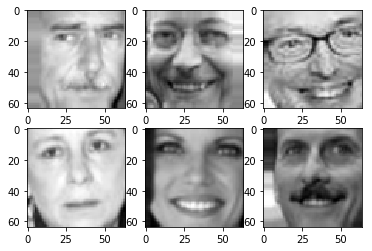

In [11]:


x,y = data_train.next()

#fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    plt.subplot(2,3 ,i)
    image = x[i]     
    plt.imshow(image.reshape(64, 64), cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
x[0].shape

(64, 64, 1)

# Modelo CNN 

In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (64,64,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), input_shape = (64,64,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
__________

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Salvando o melhor modelo (melhor conjunto de pesos)
check = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
early = EarlyStopping(monitor='val_loss',patience=2)
tensorboard = TensorBoard(log_dir='./logs')

model.fit_generator(data_train, steps_per_epoch=840, epochs=10, validation_steps=122, validation_data=data_val,
                    use_multiprocessing=True,
                    callbacks=[check, early, tensorboard]                  
                   
                   )

Epoch 1/10
840/840 [==============================] - 48s 57ms/step - loss: 0.1807 - acc: 0.9324 - val_loss: 0.1134 - val_acc: 0.9648

Epoch 00001: val_loss improved from inf to 0.11341, saving model to weights.hdf5
Epoch 2/10
840/840 [==============================] - 46s 54ms/step - loss: 0.0530 - acc: 0.9812 - val_loss: 0.1801 - val_acc: 0.9424

Epoch 00002: val_loss did not improve from 0.11341
Epoch 3/10
840/840 [==============================] - 47s 56ms/step - loss: 0.0338 - acc: 0.9891 - val_loss: 0.0836 - val_acc: 0.9646

Epoch 00003: val_loss improved from 0.11341 to 0.08364, saving model to weights.hdf5
Epoch 4/10
840/840 [==============================] - 49s 59ms/step - loss: 0.0235 - acc: 0.9912 - val_loss: 0.0896 - val_acc: 0.9718

Epoch 00004: val_loss did not improve from 0.08364
Epoch 5/10
840/840 [==============================] - 47s 56ms/step - loss: 0.0181 - acc: 0.9944 - val_loss: 0.1052 - val_acc: 0.9756

Epoch 00005: val_loss did not improve from 0.08364


In [16]:
#model.save_weights("./pesos.hdf5")

In [17]:
#model1 = model

#model1.load_weights('./pesos.hdf5')

In [20]:
score = model.evaluate_generator(data_test,steps= 239, verbose=1)
score


239/239 [==============================] - 7s 31ms/step


[0.10256727450372488, 0.9651991615588643]

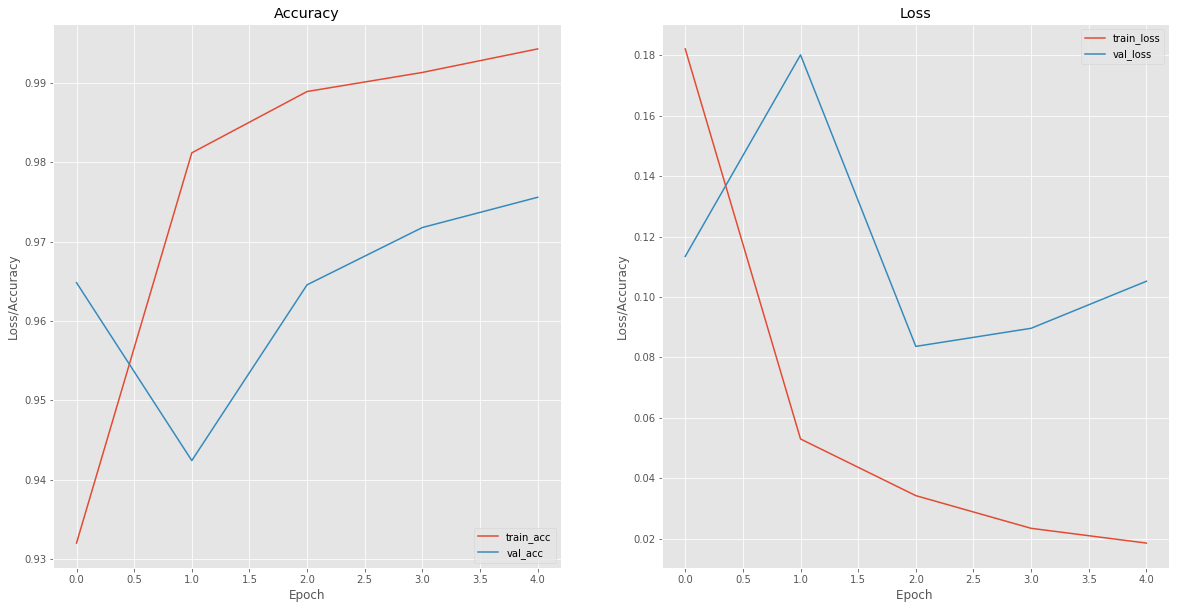

In [22]:
# plot the training loss and accuracy

H = model.history

N = 5
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.style.use("ggplot")
#plt.figure(figsize=(10,10))
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
plt.savefig("plot.png")


plt.subplot(1,2,2)

#plt.figure(figsize=(10,10))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig("plot1.png")

plt.show()

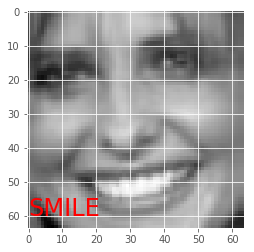

In [24]:
x,y = data_test.next()

pred = model.predict(x)

if pred[0] == 1:
    result = "SMILE"
    #print (result)
else:
    result = "NO-SMILE"
    #print (result)

image = x[0]     
plt.imshow(image.reshape(64, 64), cmap=plt.get_cmap('gray'))
plt.text(0,60, result, fontsize=24,color='red')
plt.show()